## Imports

In [ ]:
#general imports that we will need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# data partition
from sklearn.model_selection import train_test_split

#filter methods
# spearman 
# chi-square
import scipy.stats as stats
from scipy.stats import chi2_contingency

#wrapper methods
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_selection import RFE


# embedded methods
from sklearn.linear_model import LassoCV

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

#set random seed for reproducibility
RSEED = 42
np.random.seed(RSEED)

: 

## Import the dataset

In [ ]:
# this loads the train data 
train = pd.read_csv('project_data/train.csv')

In [15]:
train.head()
train.tail()

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
75968,37194,Mercedes,C Class,2015.0,13498,Manual,14480.0,etrol,125.0,53.3,2.0,78.0,0.0,0.0
75969,6265,Audi,Q3,2013.0,12495,Semi-Auto,52134.0,Diesel,200.0,47.9,2.0,38.0,2.0,0.0
75970,54886,Toyota,Aygo,2017.0,8399,Automatic,11304.0,Petrol,145.0,67.0,1.0,57.0,3.0,0.0
75971,860,Audi,Q3,2015.0,12990,Manual,69072.0,iesel,125.0,60.1,2.0,74.0,2.0,0.0
75972,15795,Ford,Fiesta,2018.0,10495,Manual,16709.0,Petro,145.0,64.2,1.1,38.0,1.0,0.0


In [16]:
train.describe()

,carID,year,price,mileage,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
count,75973.000000,74482.000000,75973.000000,74510.000000,68069.000000,68047.000000,74457.000000,74449.000000,74423.000000,74425.0
mean,37986.000000,2017.096611,16881.889553,23004.184088,120.329078,55.152666,1.660136,64.590667,1.994580,0.0
std,21931.660338,2.208704,9736.926322,22129.788366,65.521176,16.497837,0.573462,21.021065,1.472981,0.0
min,0.000000,1970.000000,450.000000,-58540.574478,-91.121630,-43.421768,-0.103493,1.638913,-2.345650,0.0
25%,18993.000000,2016.000000,10200.000000,7423.250000,125.000000,46.300000,1.200000,47.000000,1.000000,0.0
50%,37986.000000,2017.000000,14699.000000,17300.000000,145.000000,54.300000,1.600000,65.000000,2.000000,0.0
75%,56979.000000,2019.000000,20950.000000,32427.500000,145.000000,62.800000,2.000000,82.000000,3.000000,0.0
max,75972.000000,2024.121759,159999.000000,323000.000000,580.000000,470.800000,6.600000,125.594308,6.258371,0.0


## Verify that carID can be used as index

In [18]:
train['carID'].is_unique

True

In [19]:
train['carID'].isna().any()

False

## Set carID as index

In [21]:
train.set_index('carID', inplace = True)

In [22]:
train.sort_index(inplace =True)

In [23]:
train.head()

,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,,
0,Aud,A3,2016.0,10990,Manual,57097.0,Diesel,0.0,83.1,1.6,75.0,4.0,0.0
1,Audi,A7,2017.0,22999,Semi-Auto,24337.0,diesel,150.0,55.4,3.0,31.0,0.0,0.0
2,Audi,A4,2016.0,14242,Manual,14900.0,Petrol,125.0,53.3,1.4,65.0,4.0,0.0
3,Audi,Q3,2017.0,15998,Manual,37151.0,Petrol,145.0,51.4,1.4,55.0,1.0,0.0
4,NaN,A6,2019.0,30850,Automatic,4553.0,Diesel,145.0,47.9,2.0,62.0,0.0,0.0


## Split the data

Target variable is *price*

In [130]:
train['price'].describe()

count     75973.000000
mean      16881.889553
std        9736.926322
min         450.000000
25%       10200.000000
50%       14699.000000
75%       20950.000000
max      159999.000000
Name: price, dtype: float64

In [134]:
train['price'].isna().sum()

0

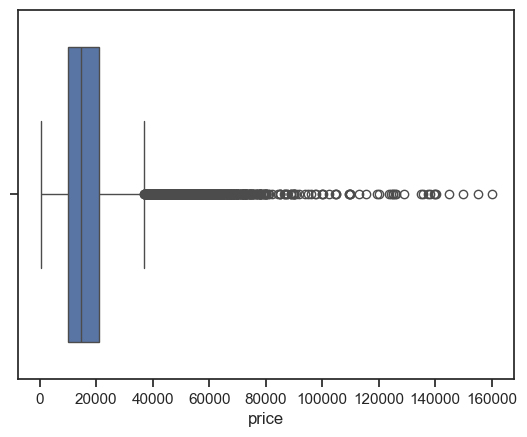

In [35]:
sns.set_style("ticks")
sns.boxplot(x = train["price"])
plt.show()

In [150]:
y = train['price']
X = train.drop(columns=['price'])

# stratify by bins helps to mantain the distribution between train and val data, used log because price is very skewed
y_bins = pd.qcut(np.log1p(y), q=10, duplicates='drop')

X_train, X_val, y_train, y_val = train_test_split(X, y,
                                            test_size=0.30,
                                            stratify=y_bins,
                                            random_state=42)

#random_state mantains the same exact distribution, so train and val will always have the same observations (every time you run this code)(42 its just a random number, could be anything) 

In [148]:
X_train

,Brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,
43038,Mercedes,A Class,2018.0,Automatic,6731.0,Petrol,145.0,53.3,1.3,80.0,4.0,0.0
52694,Toyota,Corolla,2019.0,Automatic,3988.0,Hybrid,135.0,72.4,2.0,57.0,3.0,0.0
4950,Aud,A3,2016.0,Semi-Auto,14298.0,Petrol,30.0,58.9,1.4,73.0,2.0,0.0
61621,Opel,Corsa,2018.0,Manual,8857.0,Petrol,NaN,55.4,1.4,63.0,3.0,0.0
51944,Toyot,Yaris,2017.0,unknown,28977.0,Petrol,30.0,55.0,1.3,91.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
13867,BMW,1 Series,2017.0,Manual,28133.0,Diesel,145.0,65.7,2.0,63.0,0.0,0.0
32584,Hyundai,I20,2019.0,MANUAL,4000.0,Petrol,145.0,46.3,1.2,37.0,1.0,0.0
32354,Hyundai,I10,2018.0,Manua,31375.0,Petrol,150.0,60.1,1.0,55.0,NaN,0.0


In [61]:
X_val

,Brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,
39781,Mercedes,GLC Class,2019.0,Automatic,16283.0,Diesel,145.0,41.5,2.100000,81.0,2.0,0.0
34303,Hyundai,Tucson,2015.0,Manual,7900.0,Diesel,30.0,61.7,1.700000,73.0,1.0,0.0
73016,VW,T-Cross,2019.0,Manual,6000.0,Diesel,145.0,52.3,1.600000,78.0,0.0,0.0
47372,Skoda,Superb,2019.0,Semi-Auto,10547.0,Diesel,145.0,62.8,2.000000,66.0,4.0,0.0
75852,VW,Pol,2020.0,Manual,1950.0,Petrol,145.0,48.7,0.186425,98.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
44080,Mercedes,C Class,2016.0,AUTOMATIC,50995.0,Diesel,NaN,NaN,1.600000,59.0,3.0,0.0
71825,VW,Touran,2016.0,Manual,54400.0,Diesel,30.0,64.2,1.600000,40.0,4.0,0.0
26772,Ford,Fiesta,NaN,Automatic,70000.0,Petrol,205.0,42.8,1.400000,78.0,0.0,0.0


# **Data exploration**

# Numerical variables

In [39]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
year,52126.0,2017.098261,2.222058,1970.000000,2016.00,2017.0,2019.0,2024.121759
mileage,52134.0,22940.901586,22091.150878,-58540.574478,7441.25,17251.0,32359.5,323000.000000
tax,47686.0,120.437746,65.477467,-91.121630,125.00,145.0,145.0,580.000000
mpg,47677.0,55.068870,16.419273,-43.421768,46.30,54.3,62.8,470.800000
engineSize,52121.0,1.659101,0.573329,-0.103493,1.20,1.6,2.0,6.200000
paintQuality%,52115.0,64.711656,21.038080,1.638913,47.00,65.0,82.0,125.594308
previousOwners,52104.0,1.993726,1.473086,-2.345650,1.00,2.0,3.0,6.258371
hasDamage,52068.0,0.000000,0.000000,0.000000,0.00,0.0,0.0,0.000000


- **Count is different in every variable (because of nan values)** — figure out what to do to nan values
- ***hasDamage* as only 0's** — delete the variable because is useless
- ***previousOwners* has negative values and max values is not int** — figure out what to do to negative and non int values
- **Max value of *paintQuality* is above 100%** — not sure if its supposed to
- ***engineSize* has negative values** — try to understand why and what do to abt it
- ***mpg (miles per gallon)* has negative values** — try to understand why and what do to abt it
- ***tax* has negative values** — try to understand why
- ***mileage* has negative values** — try to understand why
- ***years* seems fine** — maybe evaluate if non int values make sense

### nan values count

In [78]:
X_train.isna().sum()

Brand             1067
model             1039
year              1055
transmission      1050
mileage           1047
fuelType          1060
tax               5495
mpg               5504
engineSize        1060
paintQuality%     1066
previousOwners    1077
hasDamage         1113
dtype: int64

## Numerical Variables more in dept:

### *—previousOwners—*

there's like 600 observations with non int values

In [65]:
X_train['previousOwners'].unique()

array([ 4.        ,  3.        ,  2.        ,  1.        ,  0.        ,
        6.25823052, -2.33936045,         nan, -2.29943868, -2.31225953,
        6.23308217,  6.24177863,  6.25837066, -2.34030622, -2.33744529,
       -2.34565   ,  6.24583495,  6.23017958,  6.21772443,  6.22789796,
       -2.31733109, -2.33512284, -2.34010209,  6.2482512 ])

In [69]:
#X_train.loc[train['previousOwners'] > (4), ['previousOwners']]
train.loc[train['previousOwners'] < (0), ['previousOwners']]

,previousOwners
carID,
213,-2.335123
230,-2.335123
479,-2.335123
547,-2.335123
632,-2.335123
...,...
75498,-2.345650
75542,-2.345650
75549,-2.345650


### *— paintQuality% —*

1565 weird values, 1066 of them are nan

In [72]:
X_train['paintQuality%'].unique()

array([ 80.        ,  57.        ,  73.        ,  63.        ,
        91.        ,  68.        ,  88.        ,  75.        ,
        87.        ,  35.        ,  95.        ,  94.        ,
        84.        ,  85.        ,  99.        ,  38.        ,
        89.        ,  71.        ,  45.        ,  49.        ,
        42.        ,  78.        ,  37.        ,  62.        ,
        66.        ,  74.        ,  98.        ,  54.        ,
                nan,  40.        ,  34.        ,  97.        ,
        90.        ,  59.        ,  33.        ,  61.        ,
        44.        ,  55.        ,  81.        ,  48.        ,
        46.        ,  32.        ,  77.        ,  70.        ,
        41.        ,  79.        ,  53.        ,  76.        ,
        39.        ,  65.        ,  60.        ,  92.        ,
         3.1152953 ,  47.        ,  51.        ,  67.        ,
        36.        ,  96.        ,  31.        ,  56.        ,
        64.        ,  83.        ,  72.        ,  82.  

In [74]:
X_train.loc[train['paintQuality%'] != round(train['paintQuality%']), ['paintQuality%']]

,paintQuality%
carID,
75078,NaN
48391,NaN
1249,3.115295
33913,NaN
42991,125.202033
...,...
75527,NaN
66160,NaN
43845,NaN


### *— engineSize —*

Only a few rows of negative values

In [81]:
X_train.loc[train['engineSize'] < (0), ['engineSize']]

,engineSize
carID,
23710,-0.103493
18906,-0.103493
25300,-0.103493
24064,-0.103493
22182,-0.103493
24953,-0.103493
15255,-0.103493
15972,-0.103493
29674,-0.103493


### *—mpg—*

The negative observations value is always "-43.42176751" and theres only a few of them

In [85]:
X_train['mpg'].unique()

array([ 53.3       ,  72.4       ,  58.9       ,  55.4       ,
        55.        ,  67.3       ,  61.4       ,  43.5       ,
        48.7       ,  41.5       ,  70.6       ,  65.7       ,
        60.1       ,  47.1       ,  54.3       ,  68.9       ,
        52.3       ,  40.4       ,  37.2       ,  74.3       ,
        57.7       ,  83.1       ,          nan,  69.        ,
        46.3       ,  45.6       ,  44.1       ,  49.6       ,
        40.9       ,  25.4       ,  64.2       ,  38.2       ,
        39.8       ,  50.4       ,  62.8       ,  56.5       ,
        42.8       ,  39.2       ,  30.4       ,  42.2       ,
        78.5       ,  66.        ,  35.3       ,  33.6       ,
        38.7       ,  51.4       ,  34.        ,  33.2       ,
        44.8       ,  47.9       ,  65.6       ,  36.2       ,
        78.4       ,  89.77369267,  32.8       ,  51.1       ,
        76.4       ,  42.16      ,  36.7       ,   9.42917895,
        61.7       ,  37.7       ,  92.11045521,  32.5 

In [87]:
X_train.loc[train['mpg'] < (0), ['mpg']]

,mpg
carID,
8314,-43.421768
9202,-43.421768
14420,-43.421768
13723,-43.421768
7781,-43.421768
14127,-43.421768
14767,-43.421768
13134,-43.421768
12026,-43.421768


### *— tax —*

There's 262 negative values

In [89]:
X_train['tax'].unique()

array([145.        , 135.        ,  30.        ,          nan,
         0.        , 125.        , 150.        ,  20.        ,
       200.        , 240.        , 300.        , 160.        ,
       260.        , 165.        , -45.78061049, 140.        ,
       265.        , 195.        , 235.        , 205.        ,
       305.        , 316.48718937, -31.91494466, 303.14889146,
       -43.24208237, 120.        , -49.15354066, 330.        ,
       316.29630636, 325.        , 570.        , 290.        ,
       -20.24107949, 580.        , -91.12163048, 155.        ,
       -60.6840948 , 294.84340933, 277.38425448, -56.19320154,
       555.        , 115.        , 299.47350391, 185.        ,
       565.        ,  10.        , 290.48678508, 255.        ,
       326.02823317, 327.91577835, 270.        , 190.        ,
       -18.33074314, 280.        , 230.        , 520.        ,
       315.        , 245.        , 220.        , 110.        ,
       535.        , 210.        , 540.        , 250.  

In [91]:
X_train.loc[train['tax'] < (0), ['tax']]

,tax
carID,
28716,-45.780610
31534,-31.914945
14457,-43.242082
69153,-49.153541
64445,-20.241079
...,...
41356,-56.193202
62361,-20.241079
5290,-60.684095


### *— mileage —*

There's 271 negative values

In [94]:
X_train.loc[train['mileage'] < (0), ['mileage']]

,mileage
carID,
46106,-50755.210230
14743,-58540.574478
61235,-42707.564215
41798,-50755.210230
52966,-39765.602338
...,...
39049,-50755.210230
70374,-48190.655673
55841,-42707.564215


# Categorical variables

In [97]:
X_train.describe(include = 'object').T

,count,unique,top,freq
Brand,52114,72,Ford,10347
model,52142,688,Focus,4412
transmission,52131,40,Manual,26663
fuelType,52121,33,Petrol,26681


- **Count is different (nan values)**

## Categorical variables more in dept:

Misspelling, spaces and uppercase/lowercase are problems (also nan)

In [99]:
X_train['Brand'].unique()

array(['Mercedes', 'Toyota', 'Aud', 'Opel', 'Toyot', nan, 'ercedes', 'vw',
       'Ford', 'Audi', 'BMW', 'VW', 'V', 'Skoda', 'udi', 'Hyundai', 'bmw',
       'AUDI', 'W', 'Hyunda', 'ford', 'ORD', 'BM', 'opel', 'HYUNDAI',
       'OPEL', 'FORD', 'Skod', 'MW', 'MERCEDES', 'For', 'ord', 'Mercede',
       'TOYOTA', 'toyota', 'Ope', 'audi', 'oyota', 'mercedes', 'pel',
       'SKODA', 'yundai', 'koda', 'skoda', 'for', 'hyundai', 'mw',
       'mercede', 'SKOD', 'OPE', 'ercede', 'hyunda', 'kod', 'OYOTA', 'ud',
       'FOR', 'ope', 'ERCEDES', 'or', 'v', 'w', 'aud', 'pe', 'PEL',
       'skod', 'yunda', 'UDI', 'HYUNDA', 'KODA', 'toyot', 'AUD',
       'MERCEDE', 'TOYOT'], dtype=object)

In [101]:
X_train['model'].unique()

array([' A Class', ' Corolla', ' A3', ' Corsa', ' Yaris', ' Mondeo',
       ' E Class', ' TIGUAN', ' FOCUS', ' Grandland X', ' Fiest',
       ' 2 Series', ' Fiesta', ' A', ' C CLASS', ' Focus', ' Polo',
       ' Golf', ' Tiguan', ' GLS Class', ' Fabia', ' Astra', ' golf',
       ' C Class', ' Mokka X', ' c-max', ' Aygo', ' T-ROC', 'Focus',
       ' 3 series', ' X5', ' Caddy Maxi Life', ' X3', ' Citigo', ' C-HR',
       ' V Class', ' CL Class', ' A5', ' I10', ' X1', ' Viva', ' Touareg',
       ' Up', ' A4', ' X2', ' Superb', ' Q5', ' a3', ' GLC Class',
       ' Kuga', ' 5 Series', ' A CLASS', ' Passat', ' Octavia', ' A8',
       ' I40', ' SLK', nan, ' GLE Class', ' EcoSport', ' B-MAX', ' Q2',
       ' E CLASS', ' Q3', ' 3 Series', ' RS3', ' Yeti Outdoor',
       ' Santa Fe', ' A6', ' Avensis', ' GLA Class', ' SL CLASS',
       ' Santa F', 'Kuga', ' California', 'Astra', 'Fiesta', ' Karoq',
       ' 4 Series', ' A1', ' 1 Series', ' Auris', ' GT86', ' I30',
       ' Sharan', 'Zafira', ' B

In [103]:
X_train['transmission'].unique()

array(['Automatic', 'Semi-Auto', 'Manual', 'unknown', 'anual', 'manual',
       ' Manual ', 'emi-Auto', nan, 'Automati', 'utomatic', 'MANUAL',
       'Other', 'Manua', 'semi-auto', 'automatic', ' MANUAL ',
       'AUTOMATIC', 'anua', 'SEMI-AUTO', 'Semi-Aut', 'AUTOMATI',
       'automati', ' Manual', 'utomati', 'nknown', 'semi-aut', 'UTOMATIC',
       'ANUAL', 'Manual ', 'unknow', 'manual ', ' manual ', 'MANUA',
       'UNKNOWN', 'SEMI-AUT', 'nknow', 'emi-auto', 'EMI-AUTO', 'manua',
       'emi-Aut'], dtype=object)

In [105]:
X_train['fuelType'].unique()

array(['Petrol', 'Hybrid', 'DIESEL', 'Diesel', 'Other', 'petrol', nan,
       'PETROL', 'Petro', 'etrol', 'iesel', 'Diese', 'diesel', 'OTHER',
       'etro', 'Othe', 'YBRID', 'ETROL', 'ybrid', 'PETRO', 'hybrid',
       'ther', 'Hybri', 'diese', 'IESEL', 'HYBRID', 'Electric', 'petro',
       'iese', 'DIESE', 'ybri', 'HYBRI', 'ETRO', 'other'], dtype=object)

##### With *"train['carID'].is_unique"* done above, we saw that every carID was different so we should assume that the duplicates are actually different cars

In [109]:
X_train.duplicated().sum()

5